### Задачи
1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных,
число пропущенных значений и описательную статистику.
2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому
или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как
можно улучшить график.
3. Сколько транзакций завершились ошибкой?
4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте
гистограмму распределения числа успешных транзакций.
5. Коллега прислал Вам обновленные данные. Постройте сводную
таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена
пользователей, строк – минуты, значений – число совершенных операций в указанную
минуту. Пропущенные значения заполните нулями.
6. Изучите представленный график. Помогите коллеге разобраться, есть ли в
данных ошибка, или же всё хорошо.
7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут,
прошедших с начала дня, в колонку true_minute.

In [ ]:
# Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_transaction = pd.read_csv('./transaction_data.csv')

In [9]:
df_transaction.shape

(5315, 3)

In [10]:
df_transaction.dtypes

date           object
name           object
transaction    object
dtype: object

In [29]:
df_transaction.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [18]:
df_transaction.isnull().values.any()

False

In [ ]:
# Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? 
# Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

In [31]:
df_transaction.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [34]:
df_transaction.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [47]:
transaction_status = df_transaction.groupby('transaction', as_index=False)\
    .agg({'date':'count'})

In [48]:
transaction_status

,transaction,date
0,cancelled,1619
1,error,4
2,successfull,3692


<Axes: xlabel='transaction', ylabel='date'>

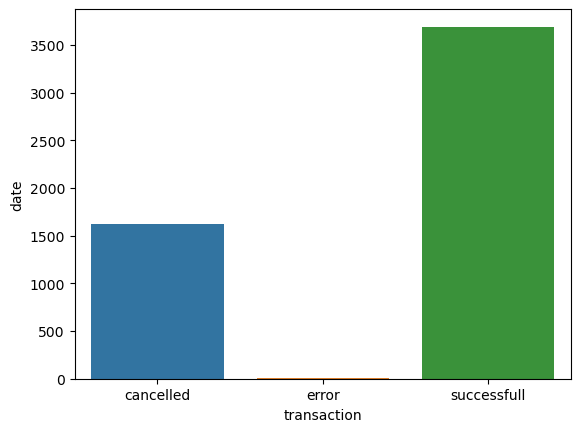

In [52]:
sns.barplot(transaction_status, x="transaction", y="date")

In [ ]:
# Сколько транзакций завершились ошибкой?

In [66]:
transaction_status.query("transaction == 'error'")

,transaction,date
1,error,4


In [ ]:
# Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [72]:
transaction_status_succ = df_transaction.groupby(['transaction','name',], as_index=False)\
    .agg({'date':'count'})\
    .query("transaction == 'successfull'")\
    .rename(columns = {'date':'sum_success'})

In [73]:
transaction_status_succ

,transaction,name,sum_success
60,successfull,Ekaterina_Fedorova,72
61,successfull,Ekaterina_Ivanova,59
62,successfull,Ekaterina_Lesnova,63
63,successfull,Ekaterina_Ozerova,72
64,successfull,Ekaterina_Petrova,68
65,successfull,Ekaterina_Polyanova,68
66,successfull,Ekaterina_Smirnova,77
67,successfull,Irina_Fedorova,62
68,successfull,Irina_Ivanova,60
69,successfull,Irina_Lesnova,76


In [74]:
transaction_status_succ.sum_success.sum()

3692

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sum_success', ylabel='Count'>

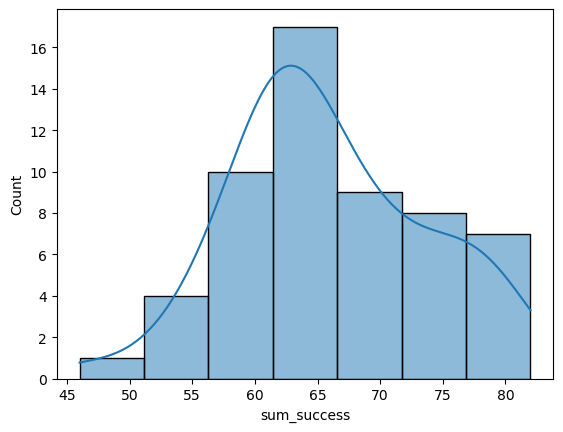

In [80]:
sns.histplot(data=transaction_status_succ, x="sum_success", kde=True)

In [ ]:
# Коллега прислал Вам обновленные данные. 
# Постройте сводную таблицу user_vs_minute_pivot, 
# где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. 
# Пропущенные значения заполните нулями.

In [217]:
df_transaction_up = pd.read_csv('./transaction_data_updated.csv', parse_dates=['date'])

In [218]:
user_vs_minute_pivot = df_transaction_up.groupby(['name','minute'], as_index=False)\
    .agg({'date':'count'})\
    .pivot(index='minute', columns='name', values='date')\
    .reset_index()\
    .fillna(0)

In [219]:
user_vs_minute_pivot

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0
9,9,2.0,4.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,...,2.0,3.0,1.0,2.0,4.0,2.0,3.0,0.0,1.0,4.0


In [220]:
# df_transaction_up.groupby(['name', 'minute'], as_index=False).size()

In [221]:
# Изучите представленный график. Помогите коллеге разобраться, есть ли в данных ошибка, или же всё хорошо.

In [222]:
user_vs_minute_pivot_control = df_transaction_up.groupby(['minute'], as_index=False)\
    .agg({'date':'count'}).fillna(0)\
    .rename(columns={'date':'number_transaction'})

In [223]:
user_vs_minute_pivot_control

,minute,number_transaction
0,0,111
1,1,145
2,2,123
3,3,129
4,4,92
5,5,99
6,6,110
7,7,111
8,8,111
9,9,113


<Axes: xlabel='minute', ylabel='number_transaction'>

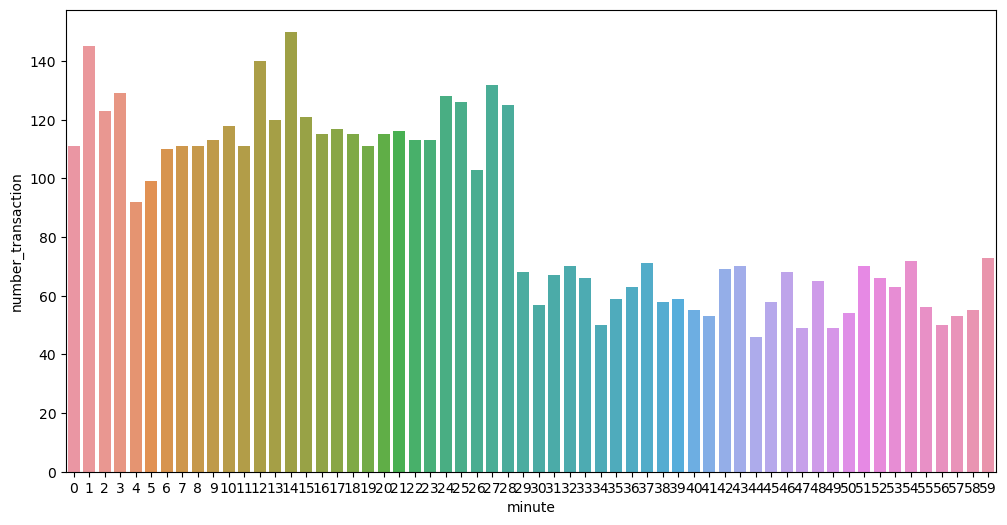

In [224]:
plt.figure(figsize=(12,6))
sns.barplot(data=user_vs_minute_pivot_control, x="minute", y="number_transaction")

<Axes: >

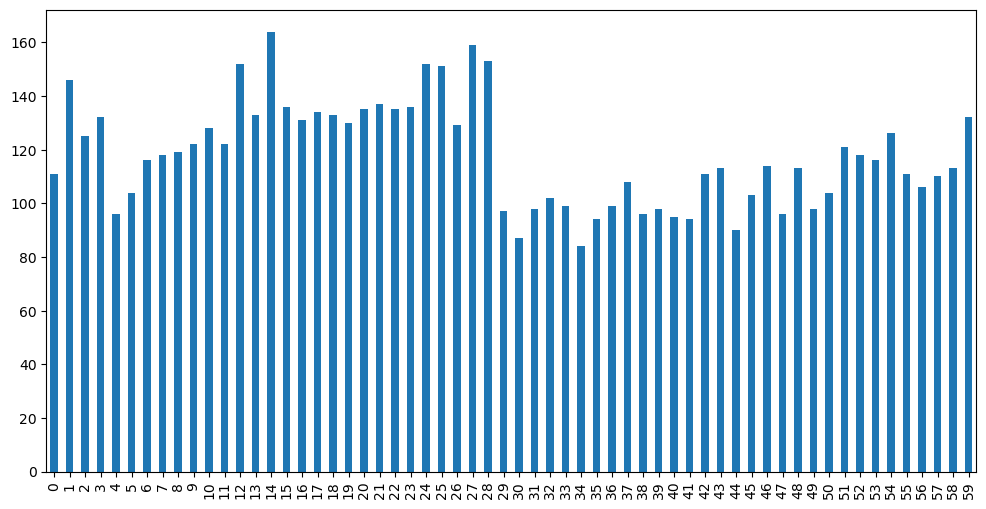

In [225]:
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(12,6))

In [211]:
# Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [232]:
df_transaction_up['true_minute'] = df_transaction_up.date.dt.minute+ df_transaction_up.date.dt.hour*60

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

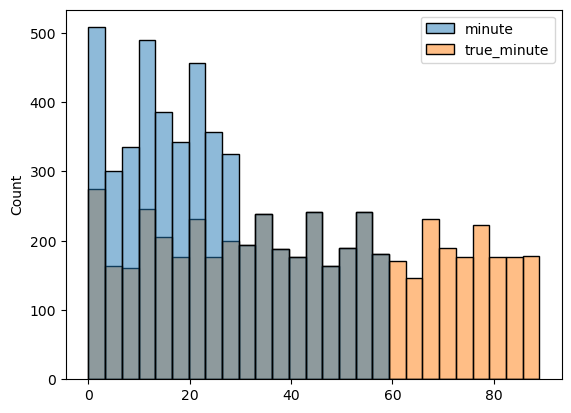

In [235]:
sns.histplot(data=df_transaction_up)